In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

### a) Descargar datos experimentales

### b) Cargar datos y realizar filtrado

In [2]:
Data = pd.read_csv('DataRotacion.csv')
filter = Data["angle"] == 30
h = Data[filter]["h"]
y = Data[filter]["y"]
sigmay = Data[filter]["sigmay"]
angle = Data[filter]["angle"]
g = 9.8
w0 = np.ones(1)


### c) Definir modelo Fisico

In [3]:
def coriolis_deviation(h0, lat, g, w):
    return (2 * np.sqrt(2) * w * np.cos(np.deg2rad(lat)) * np.sqrt(h0**3 / g))/3

### d) Defina Chi cuadrado

In [4]:
def chi_square(w, h, y, sigmay, angle, g):
    return np.sum((y - coriolis_deviation(h, angle, g, w))**2 / sigmay**2)


### e) Minimice usando optimize

In [5]:

aux = lambda *w: chi_square(*w)
result = optimize.minimize(aux, w0, args=(h, y, sigmay, angle, g), options={'disp': True})
bestparam = result.x
print(bestparam)

         Current function value: 2.291436
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
[7.24030776e-05]


### f) Dibuje los datos del modelo para dicha latitud

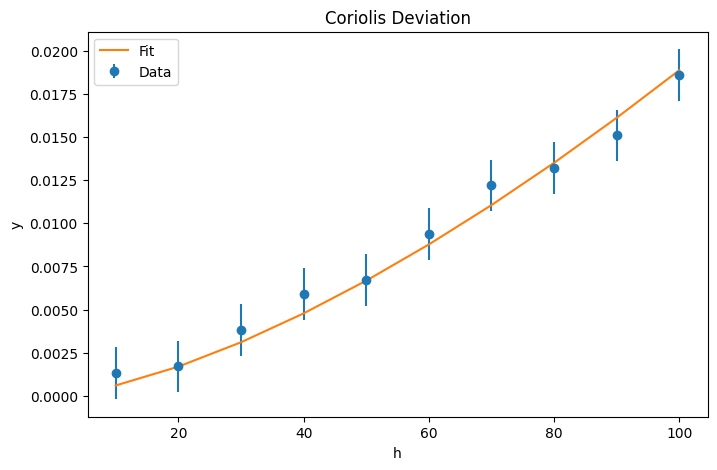

In [6]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.errorbar(h, y, sigmay, fmt='o', label='Data')
ax.plot(h, coriolis_deviation(h, angle, g, bestparam), label='Fit')
ax.set_xlabel('h')
ax.set_ylabel('y')
ax.set_title('Coriolis Deviation')
ax.legend()
plt.show()